# 2a Pràctica IA: Machine Learning


Autors: **Jaume Adrover Fernandez i Joan Balaguer Llagostera**

En aquesta pràctica el nostre objectiu és aplicar diferents classificadors a un problema real. En el nostre cas, prediurem les probabilitats de sobreviure al Titanic segons unes característiques elegides.

## 1 Observació de les Dades Porporcionades


### 1.1 Imports Necessaris

In [1]:
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import copy

### 1.1 Importació i Descripció del Dataset

Primer de tot, ens encarrem de carregar el dataset amb la llibreria pandas.

In [2]:
data=pd.read_csv("./dades.csv")

Durant aquesta fase de la EDA, hem de obtenir la màxima informació del dataset possible, mitjançant gràfics i altres mesures. L'objectiu d'aquesta observació de dades és entendre com ens han proporcionat la informació dels passatgers en el dataset per tal de després poder fer una netetja de les dades eficient i de qualitat. Anem a observar les primeres instàncies del dataset:

In [3]:
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

A primera vista, observam que el dataset conté la següent llista de columnes/atributs dels passatgers:
1. **PassengerId**: nombre identificador de cada passatger.
2. **Survived**: atribut que ens indica si el passatger va sobreviure (1) o va morir (0).
3. **Pclass**: columna que califica als passatgers segons la classe a la que pertanyien. En aquesta columna, els valors poden ser 1 (primera classe), 2 (segona classe), 3 (tercera classe). Bàsicament la diferencia entre classes és el preu dels billets.
4. **Name**: indica el nom del passatger.
5. **Sex**: atribut que indica si el passatger és un home (male) o dona (female). Per tant aquest només podrà prendre 2 valors.
6. **Age**: columna que indica l'edat del passatger.
7. **SibSp**: atribut booleà el qual ens indica si el passatger tenia germans (siblings) o dona (spouses) a bord.
8. **Parch**: atribut booleà que ens indica si el passatger tenia pares (parents) o fills (children) a bord.
9. **Ticket**: columna que ens mostra el que pareix algun tipus d'identificador del billet de cada passatger.
10. **Fare**: preu que va pagar cada passatger per la compra del billet del vaixell.
11. **Cabin**: identificador de la cabina (en cas que en tingués) del passatger.
12. **Embarked**: aquesta columna indica per quin port va embarcar al vaixell el passatger (C = Cherbourg, Q = Queenstown, S = Southampton).

Per tant, el data set conté 891 mostres amb 11 característiques, descartant la de survived. Una vegada identificat que signifiquen cada una de les columnes podem començar a treure les primeres conclusions dels atributs del nostre dataset.

### 1.2 Edat

Primer de tot, veurem la quantitat de gent que hi ha i la mitja d'edat.

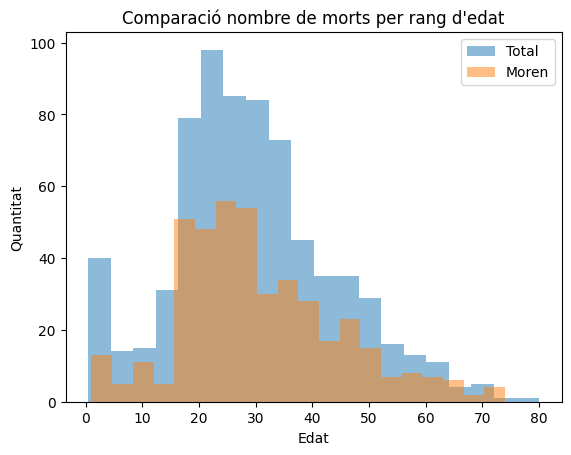

In [5]:
df_tot = data
df_died = data.loc[data['Survived'] == 0]
plt.hist(df_tot['Age'], bins=20, alpha=0.5, label='Total')
plt.hist(df_died['Age'], bins=20, alpha=0.5, label='Moren')
plt.xlabel("Edat")
plt.ylabel("Quantitat")
plt.title("Comparació nombre de morts per rang d'edat")
plt.legend()
plt.show()

A l'anterior grafic, podem obervar la quantitat de persones que tenen una edat determinada. A més, també observam damunt cada zona de l'histograma la quantitat de morts que hi hagueren en aquella franja d'edat. Podem veure que la franja d'edat més freqüentada és la de entre 20 i 30 anys. Tot hi que hi ha alguna excepció (com per exemple els nens de entre 0-5 anys), a la majoria de rangs d'edats hi trobem una quantitat de morts bastant proporcional a la quantitat total de persones en aquell rang.

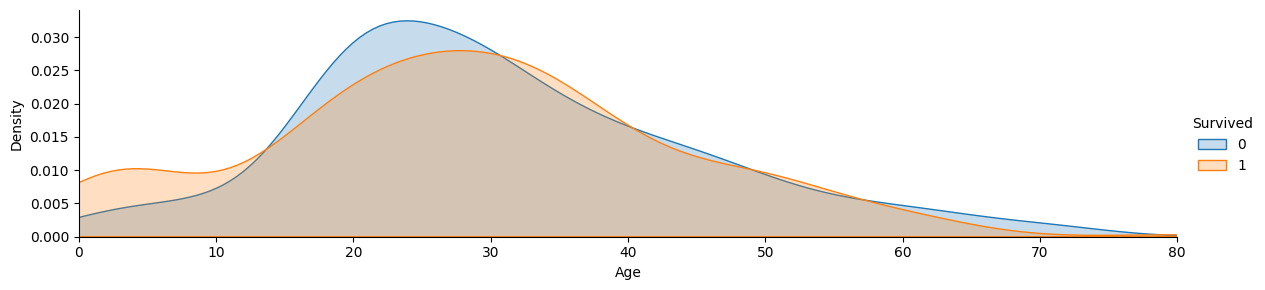

In [6]:
facet = sns.FacetGrid(data, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',fill= True)
facet.set(xlim=(0, data['Age'].max()))
facet.add_legend()

En aquest darrer gràfic, mostram la quantitat de persones que varen morir (a la llegenda 0) i sobreviure (a la llegenda 1) segons l'edat que tenen. Amb aquest grafic, confirmem el que ja preveiem observant l'histograma anterior: cada rang d'edats té una quantitat de morts bastant proporcional al total de persones en aquest. Podem remarcar que la franja d'edat dels "nens", tenen una quantitat de supervivents bastant més gran que de morts.

### 1.3 Sexe

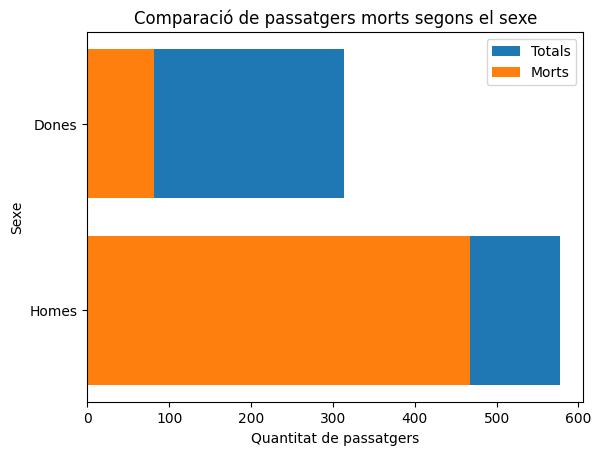

In [7]:
categories = ["Homes", "Dones"]
classes = [data.loc[(data.Sex == "male")].Sex.value_counts()['male'], data.loc[(data.Sex == "female")].Sex.value_counts()['female']]
moren = [data.loc[(data.Sex == "male") & (data.Survived == 0)].Sex.value_counts()['male'], data.loc[(data.Sex == "female") & (data.Survived == 0)].Sex.value_counts()['female']]
plt.barh(categories, classes)
plt.barh(categories, moren)
plt.xlabel("Quantitat de passatgers")
plt.ylabel("Sexe")
plt.title("Comparació de passatgers morts segons el sexe")
plt.legend(["Totals", "Morts"], loc="upper right", fontsize=10)
plt.show()

L'anterior grafic, evidencia el que era bastant previsible: el sexe de la persona és un atribut fundamental a l'hora de decidir si un passatger mor o sobreviu. Observam que la gran majoria d'homes varen morir, mentre que l gran majoria de dones varen sobreviure (degut a que als bots salvavides entraven primer els nens i dones).

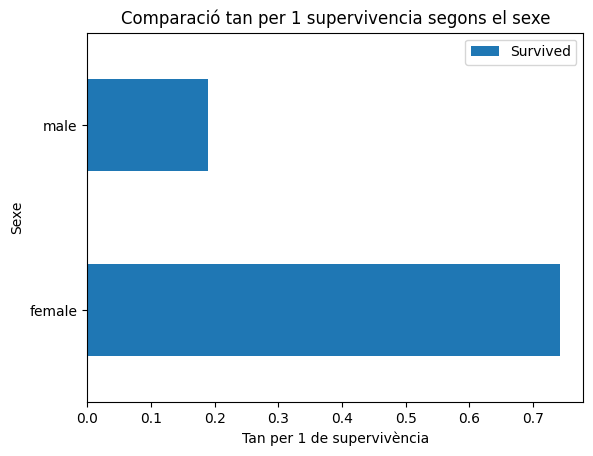

In [8]:
mitjaSupervivenciaSexe=pd.concat([data['Sex'], data['Survived']], axis=1).groupby('Sex').Survived.mean()
mitjaSupervivenciaSexe.plot(kind='barh')
plt.xlabel("Tan per 1 de supervivència")
plt.ylabel("Sexe")
plt.title("Comparació tan per 1 supervivencia segons el sexe")
plt.legend(loc="upper right")

Per acabar de confirmar les nostres sospites, hem realitzat aquest grafic on es mostren el tan per 1 d'homes i dones que es varen salvar. Com es es pot veure, la taxa de supervivència és de quasi el 80%, mentre que la dels homes no arriba al 20%.

### 1.4 Classe del Passatger

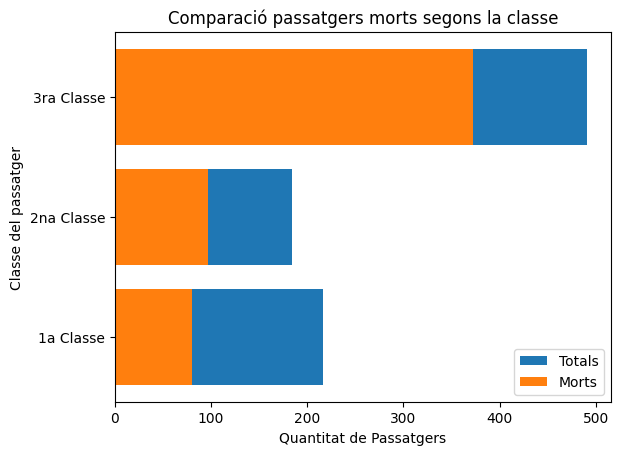

In [9]:
categories = ["1a Classe", "2na Classe", "3ra Classe"]
classes = [data.loc[(data.Pclass == 1)].Pclass.value_counts()[1], data.loc[(data.Pclass == 2)].Pclass.value_counts()[2], data.loc[(data.Pclass == 3)].Pclass.value_counts()[3]]
moren = [data.loc[(data.Survived == 0) & (data.Pclass == 1)].Pclass.value_counts()[1], data.loc[(data.Survived == 0) & (data.Pclass == 2)].Pclass.value_counts()[2], data.loc[(data.Survived == 0) & (data.Pclass == 3)].Pclass.value_counts()[3]]
plt.barh(categories, classes)
plt.barh(categories, moren)
plt.xlabel("Quantitat de Passatgers")
plt.ylabel("Classe del passatger")
plt.title("Comparació passatgers morts segons la classe")
plt.legend(["Totals", "Morts"], loc="lower right", fontsize=10)
plt.show()


En el gràfic anterior, podem veure la quantitat de persones de cada classe que viatjaven al titanic i, de cada una d'aquestes classes, veure quina quantitat de persones varen morir. Podem veure clarament que a primera classe, es varen salvar un percentatge de passatgers més alt que de segona i tercera classe. Aquest grafic ens fa adonar-nos que la classe del passatger és un factor important a l'hora de decidir si un passatger sobreviu o no.

### 1.5 Port d'Embarcació

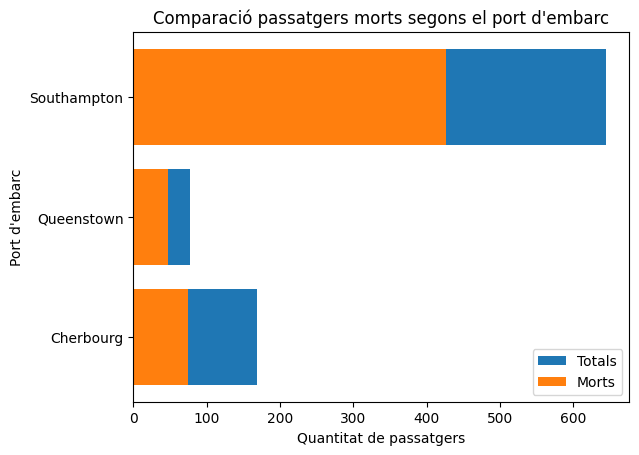

In [10]:
categories = ["Cherbourg", "Queenstown", "Southampton"]
classes = [data.loc[(data.Embarked == "C")].Embarked.value_counts()['C'], data.loc[(data.Embarked == "Q")].Embarked.value_counts()['Q'], data.loc[(data.Embarked == "S")].Embarked.value_counts()['S']]
moren = [data.loc[(data.Embarked == "C") & (data.Survived == 0)].Embarked.value_counts()['C'], data.loc[(data.Embarked == "Q") & (data.Survived == 0)].Embarked.value_counts()['Q'], data.loc[(data.Embarked == "S") & (data.Survived == 0)].Embarked.value_counts()['S']]
plt.barh(categories, classes)
plt.barh(categories, moren)
plt.xlabel("Quantitat de passatgers")
plt.ylabel("Port d'embarc")
plt.title("Comparació passatgers morts segons el port d'embarc")
plt.legend(["Totals", "Morts"], loc="lower right", fontsize=10)
plt.show()

A l'anterior grafic, podem obervar la quantita de passatger que varen embarcar a cada pot, a més de la quantitat de morts de passatgers que varen ambaracr en cada un d'ells. Observem que la gran majoria de passatgers varen embarcar a Southampton. En conceqüencia, més persones que varen embarcar en aquest port varen morir. Però en general, no veim una gran desproporció de morts respecte del total de cada classe. Per tant, amb aquest grafic no podem treure grans conclusions, però amb el següent si que podrem.

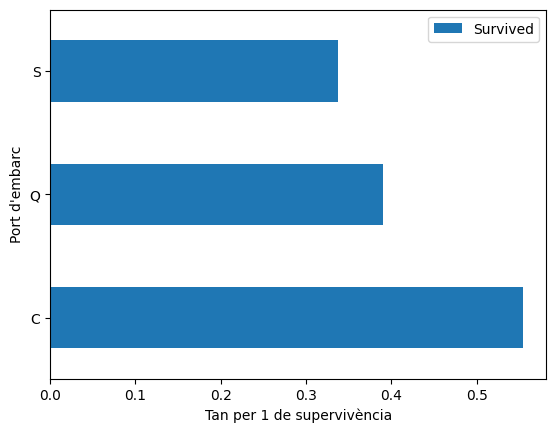

In [11]:
mitjaSupervivenciaEmbarked=pd.concat([data['Embarked'], data['Survived']], axis=1).groupby('Embarked').Survived.mean()
mitjaSupervivenciaEmbarked.plot(kind='barh')
plt.xlabel("Tan per 1 de supervivència")
plt.ylabel("Port d'embarc")
plt.legend(loc="upper right")

Com observam, la taxa de supervivència dels passatgers de Cherbourg és lleugerament més alta que la de la resta, i entre la de Queenston i Southampton no hi ha una gran diferència. Per tant, tot hi no ser un atribut crucial, s'haurà de tenir en compte per poder decidir si un passatger mor o sobreviu.

### 1.6 Familiars a bord

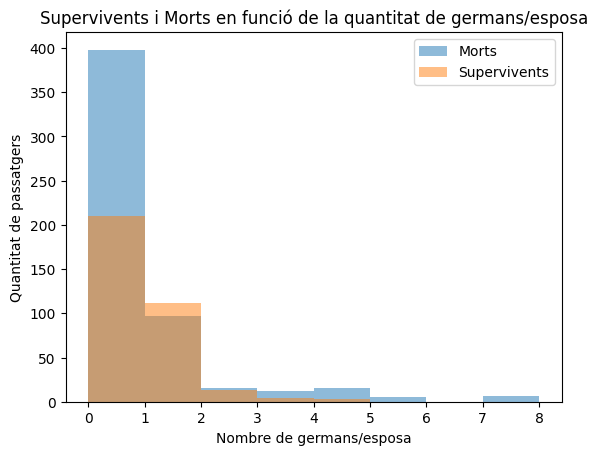

In [12]:
plt.hist(data[data["Survived"] == 0]["SibSp"], bins=range(0, data["SibSp"].max()+1), alpha=0.5, label="Morts")
plt.hist(data[data["Survived"] == 1]["SibSp"], bins=range(0, data["SibSp"].max()+1), alpha=0.5, label="Supervivents")
plt.xlabel("Nombre de germans/esposa")
plt.ylabel("Quantitat de passatgers")
plt.title("Supervivents i Morts en funció de la quantitat de germans/esposa")
plt.legend()
plt.show()

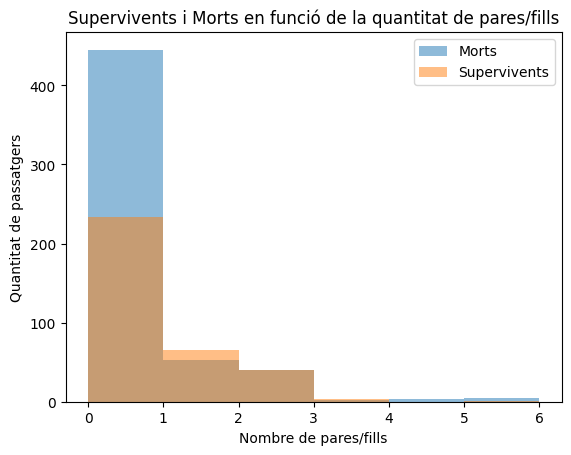

In [13]:
plt.hist(data[data["Survived"] == 0]["Parch"], bins=range(0, data["Parch"].max()+1), alpha=0.5, label="Morts")
plt.hist(data[data["Survived"] == 1]["Parch"], bins=range(0, data["Parch"].max()+1), alpha=0.5, label="Supervivents")
plt.xlabel("Nombre de pares/fills")
plt.ylabel("Quantitat de passatgers")
plt.title("Supervivents i Morts en funció de la quantitat de pares/fills")
plt.legend()
plt.show()

Els dos grafics anteriors ens mostren la quantitat de persones que varen morir/sobreviure a l'enfornsament, en funció de la quantitat de familiars que duien a bord. Per una part hem fet la comparació amb la quantitat de germans/esposa i per altre amb la quantitat de pares/fills. Les conclusions que en podem extreure d'quests grafics és que:

- Amb entre 0-1 familiars a bord (germans/esposa/pares/fills), la quantitat de morts és considerablament més gran que la de supervivents (més del doble).
- Amb 5 familiars (germans/esposa/pares/fills) o més, la quantitat de morts és molt superior a la seupervivents.
- Amb entre 1-4 pares/fills a bord, la quantitat de supervivents és molt parella a la quantitat de morts, o fins hi tot lleugerament major.
- Amb 2 germans/esposa o més, la quantitat de morts sempre és superior a la de supervivents.

Després d'extreure aquestes dades, podem dir que en líneas generals, els passatgers es salvaben més si tenien entre 1-3 familiars. Per tant, podem concloure que la quantitat de familiars, també és un factor a tenir en compte en la decisió de si un passatger sobreviu o mor.

### 1.7 Conclusions

Després d'haver explorat tot el nostre dataset del Titanic, obtenim aquestes conclusions:
1. La majoria de la gent té entre 20-30 anys.
2. La majoria són homes.
3. El % de supervivència en dones és molt major que els homes, suposant que tenien lloc abans en els bots auxiliars.
4. La majoria estava a tercera classe, suposam que era la més econòmica.
5. Molta més gent de primera classe es va salvar que gent de tercera o segona classe (proporcionalment a la qauntitat total de persones de la classe)
6. Atributs com el port d'embarcació, l'edat o la quantitat de familiars a bord, son factors a tenir en compte donat el seu impacte en la quantitat de morts o supervivents, però no son tan diferencials com el sexe o la classe del passatger.

## 2 Manipulació dades


En aquesta part de la pràctica, manipularem les dades per tal que quedin el millor possible per quan possem en marxa els diferents tipus de classificadors.

### 2.1 Eliminació de Dades irrellevants

Després haver observat totes les dades i treure conclusions, anam a manipular les dades a un format correcte per al seu posterior ús en una fase d'entrenament. Primer de tot anem a veure quants de NaN valors tenim al nostre dataset.

<AxesSubplot:>

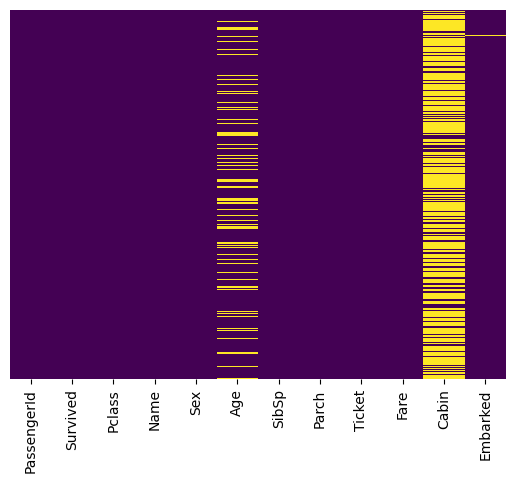

In [14]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [15]:
print("La quantitat de NAN's en Cabin es {}/{}".format(data['Cabin'].isna().sum(),len(data)))

La quantitat de NAN's en Cabin es 687/891


Després d'haver observat que la major part de valors de la columna "Cabin" son NAN's, arribem a la conclusió que el més adeqüat és eliminar la columna. També podem observar que tant PassengerID com ticket i Name ens serveixen de identificadors, informació que no serà rellevant a l'hora de determinar si un passatger sobreviurà o morirà. Per tant, també podem eliminar aquestes columnes.

In [16]:
#Eliminam les columnes "PassengerId","Ticket","Name","Cabin".
data.drop(["PassengerId","Ticket","Name","Cabin"],inplace=True,axis=1)

In [17]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

### 2.2 Emplenar Caselles amb Valors NAN Restants

Ara, després d'haver eliminat les característiques que trobam innecessàries o millor dit, no rellevants, observarem si ens falta informació a la resta de columnes.

In [18]:
total = data.isnull().sum().sort_values(ascending = False)
percentatge = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
ms=pd.concat([total, percentatge], axis=1, keys=['Total', 'percentatge'])
ms= ms[ms["percentatge"] > 0]
ms

Total  percentatge
Age         177    19.865320
Embarked      2     0.224467

Com podem observar, ens falten 177 valors per a l'edat i 2 per a Embarked. Ens centrarem principalment en l'edat ja que és una característica molt més important i que té més relació amb la supervivència. L'opció més viable és substituir tots aquests valors per la mitjana. A més, eliminarem les dues files amb el valor NaN de Embarked.

In [19]:
# Emplenam els 177 valors NAN de la columna "Age" amb la mitjana
data['Age'].fillna(value=data['Age'].median(),inplace=True)

In [20]:
# Eliminam les 2 files que tenen el valor de "Embarked" a NAN
data.dropna(subset=['Embarked'],inplace=True)

### 2.3 Dades Categòriques

En aquesta fase de la neteja de dades obtindrem les dades categòriques i les transformarem a numèriques per a poder entrenar amb elles el nostre model. 

In [21]:
data.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S

Tenim dues columnes categòriques, el "sexe" i "Embarked". Utilitzarem una substitució per 1 en el cas de home i 0 en el cas de dona ja que tan sols hi ha dos possibles valors. En el cas de Embarked i , utilitzarem el one hot encoding (hi ha 3 possibles valors), on es crearan 3 noves columnes que representaran els 3 ports possibles d'embarcament al vaixell (S, C, Q). En aquestes columnes, s'indicarà si un determinat passatger va embarcar (1) o no (0) en aquest determinat port. 

In [22]:
data['Sex']=data['Sex'].map({'male':1,'female':0}) #Canviam els valors de sexe
embark=data.pop('Embarked')
ohe_embark=pd.get_dummies(embark,prefix='embk')
data=pd.concat([data.reset_index(drop=True),ohe_embark.reset_index(drop=True)],axis=1,sort=False)

Tot i no ser una dada categòrica, plantejarem la mateixa estratègia per a la classe del passatger. Utilitzarem el one hot encoding per crear 3 noves columnes que substituiran a "Pclass". Dintre de cada una d'aquestes indicarem amb un valor booleà si aquest determinat passatger pertany (1) o no (0) a aquesta classe determinada.

In [23]:
pclass=data.pop('Pclass')
ohe_class=pd.get_dummies(pclass,prefix='class')
data=pd.concat([data.reset_index(drop=True),ohe_class.reset_index(drop=True)],axis=1,sort=False)
data.head()

Survived  Sex   Age  SibSp  Parch     Fare  embk_C  embk_Q  embk_S  \
0         0    1  22.0      1      0   7.2500       0       0       1   
1         1    0  38.0      1      0  71.2833       1       0       0   
2         1    0  26.0      0      0   7.9250       0       0       1   
3         1    0  35.0      1      0  53.1000       0       0       1   
4         0    1  35.0      0      0   8.0500       0       0       1   

   class_1  class_2  class_3  
0        0        0        1  
1        1        0        0  
2        0        0        1  
3        1        0        0  
4        0        0        1

### 2.4 Normalització de Dades

Com a darrera passa per a tenir les dades netes, hauríem de normalitzar les columnes amb valors numèrics alts com Age o Fare. Utilitzarem l'StandardScaler de la llibreria sklearn.

In [24]:
# Normalització de Dades
scaler = StandardScaler()
data.Age=scaler.fit_transform(data.Age.values.reshape(-1,1))
data.Fare=scaler.fit_transform(data.Fare.values.reshape(-1,1))
data.SibSp=scaler.fit_transform(data.SibSp.values.reshape(-1,1))
data.Parch=scaler.fit_transform(data.Parch.values.reshape(-1,1))
# Mostrem com ens queda el dataset finalment després de finalitzar la manipulació de dades
data.head()

Survived  Sex       Age     SibSp     Parch      Fare  embk_C  embk_Q  \
0         0    1 -0.563674  0.431350 -0.474326 -0.500240       0       0   
1         1    0  0.669217  0.431350 -0.474326  0.788947       1       0   
2         1    0 -0.255451 -0.475199 -0.474326 -0.486650       0       0   
3         1    0  0.438050  0.431350 -0.474326  0.422861       0       0   
4         0    1  0.438050 -0.475199 -0.474326 -0.484133       0       0   

   embk_S  class_1  class_2  class_3  
0       1        0        0        1  
1       0        1        0        0  
2       1        0        0        1  
3       1        1        0        0  
4       1        0        0        1

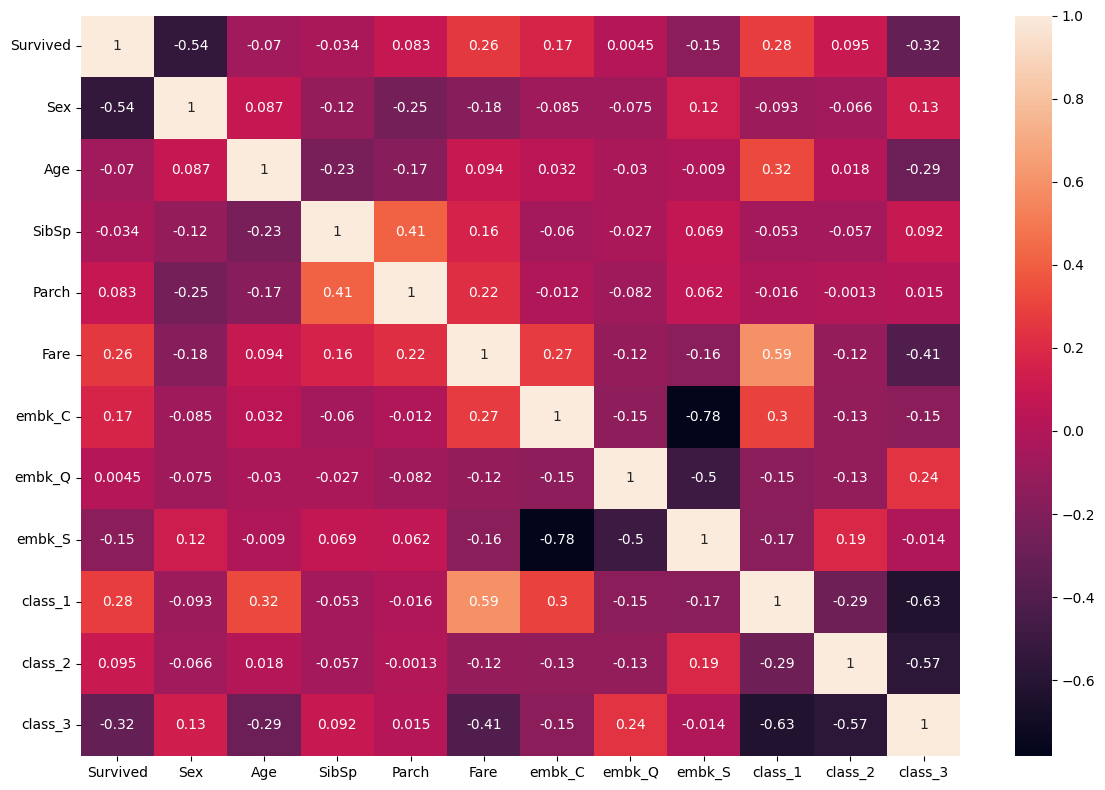

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()

Després d'haver fet la neteja de dades i obtingut la matriu de correlació ens adonem compte que els principals factors que intervenen en la predicció i que tenen més importància són aquests:

1. class_1, class_2 i class_3: amb uns valors de 0.282368, 0.0.095002 i -0.320171 respectivament, podem observar que quant major és el nombre de classe, menys probabilitats de sobreviure.
2. Sex: amb un valor de -0.54, significa que quan major sigui aquest valor menor probabilitat de supervivència tindrà la persona. Això es dona ja que hem substituit home per 1 i dona per 0. Si fos al revés, és a dir, que dona fos un nombre inferior que home, aquesta correlació siria positiva, al tenir més probabilitats de sobreviure quan major sigui el nombre enter.
3. Fare: té un valor de 0.25, indica la quantitat de diners que es varen pagar. Aquesta columna va lligada amb Pclass ja que quant més es pagava, millor classe es tenia i per tant, major % de sobreviure.
4. embk_C, embk_Q i embk_S: amb uns valors de 0.169966, 0.004536 i -0.151777 respectivament, podem observar que si el passatger es va embarcar al vaixell a Cherbourg té més possibilitats de sobreviure que si es va embarcar a Queenstown o Southampton (encara que a priori no pareixi que hagi d'influir, si que ho fa)

## 3 Models de Classificació


### 3.1 Regressió Logística


#### 3.1.1 Entrenament

El primer que farem serà observar quin és le tamany òptim que hauria de tenir les nostres dades de train i test per poder maximitzar la precissió del model. Aqeust tamany el podrem observar realitzant la següent gràfica:

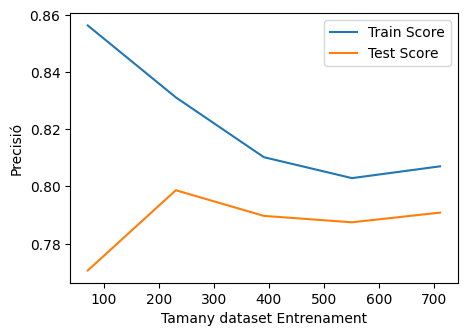

In [26]:
# Inicialitzam el nostre model sense paràmetres (random_state serveix perquè sempre sigui igual el model)
logistic_reg=linear_model.LogisticRegression(random_state = 42)
#Obtenim la columna que volem prediure dins una variable.
x = copy.deepcopy(data)
y= x.pop('Survived')
# Obtenim tamany de datasets, precisions d'entrenament i test per a visualitzar
train_size_abs, train_scores, test_scores= learning_curve(
     logistic_reg, x, y
 )

# Gràfic per a veure com evoluciona la precisió segons el tamany del dataset
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3.5)
plt.plot(train_size_abs,np.mean(train_scores,axis=1),label='Train Score')
plt.plot(train_size_abs,np.mean(test_scores,axis=1),label='Test Score')
plt.xlabel('Tamany dataset Entrenament')
plt.ylabel("Precisió")
plt.legend()
plt.show()

Com podem veure adalt, ens trobam aquest gràfic per a veure com canvia la precisió segons el tamany del dataset. El punt òptim és on el test score és màxim i train és un valor superior. Ens referiem a un nombre entre 200-250, és a dir un 30-35% aproximadament del test size. Ens podem trobar amb dues situacions possibles:

1. Overfitting: si tenim poques dades i entrenam el model molts de cops amb aquestes, només es memoritzarà aquestes solucions. Es pot resoldre augmentant el nombre de dades o no realitzant tantes iteracions sobre el dataset.
2. Underfitting: si no tenim suficients dades, al model li queda molt per aprendre i no té una precisió adequada. Es pot apreciar en el rang de 100-200, on la precisió del test va augmentant, és a dir, està aprenent.

Una vegada observat que el tamany del dataset d'entrenament hauria de rondar el 30% de les dades totals, procedirem amb la divisió de les dades entre train i test. Aquesta acció, la farem 1 vegada, ja que aquesta divisió de dades ens servirà també per als models de perceptró i abres de decisió (com veurem més endavant).

In [27]:
# Seleccionem la columna de Survived, el nostre target
label=data['Survived']
# Tamany òptim de test, aproximadament 30%
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.35, random_state = 42)
# Eliminam la nostra columna target de les dades d'entrenament i testeig
X_train.pop('Survived');
X_test.pop('Survived');

Una vegada dividides les dades, entrenarem al model passat-li les dades de train i mostrarem 1 gràfic el qual ens mostrarà informació molt valuosa:

In [28]:
# Entrenament model amb dades de train
hist=logistic_reg.fit(X_train,y_train)

#### 3.1.2 Avaluació

Per avaluar la correctesa dels nostres models utilitzarem aquestes mètriques:

1. Precisió(Accuracy): es refereix al percentatge d'acerts entre total.
2. Pèrdua(Logistic Loss): es refereix a la funció de quan enfora arriba a ser l'error de predicció del model.
3. Puntuació F1(F1 Score): es refereix a la mitja harmònica de la precisió i el 'Rceall'. La diferència és que aquesta mètrica castiga més els valors extrems.

In [29]:
# Fem la predicció del model
prediccioLogReg=logistic_reg.predict(X_test)

# Extreim els atributs de precissió, pèrdua i score F1
precisioLogReg=round(accuracy_score(prediccioLogReg,y_test)*100,2)
f1LogReg=f1_score(y_test,prediccioLogReg)

# Mostram els atributs extrets
print(classification_report(y_test, prediccioLogReg))
print('La precisió del nostre model és: ',precisioLogReg)
print('La puntuació F1 del nostre model és: ',round(f1LogReg*100,2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       190
           1       0.78      0.75      0.76       122

    accuracy                           0.82       312
   macro avg       0.81      0.80      0.81       312
weighted avg       0.82      0.82      0.82       312

La precisió del nostre model és:  81.73
La puntuació F1 del nostre model és:  76.15


#### 3.1.3 Parameter tuning

Parameter tuning es la fase on es tracta d'optimitzar la millor combinació possible de paràmetres per a millorar la precisió del model. En el nostre cas, hem escollit aquests paràmetres:

1. Penalty
2. Tolerance
3. C
4. Solver: escollir l'algoritme d'optimització. Per defecte s'utilitza 'lbfgs'.Li donarem tots els valors possibles: ‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’.

In [30]:
warnings.filterwarnings('ignore')
# Possibles atributs
penal=['l1', 'l2', 'elasticnet', None]
tole=np.arange(1e-4,0.01,0.0005)
Ce=np.logspace(-3,3,7)
solv=['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga']
parameters={'penalty':penal,'tol':tole,'C':Ce,'solver':solv}
    
# Funció que extreurà la millor combinació de paràmetres
grid=GridSearchCV(estimator=logistic_reg,param_grid=parameters,cv = 2, n_jobs=-1)

# Amb GridSearch seleccionem els millors paràmetre i els mostrem
grid.fit(X_train, y_train);
print('Els millors paràmetres que podem seleccionar són:', grid.best_params_)

/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached w

Els millors paràmetres que podem seleccionar són: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.0001}


/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/joanbalaguer/opt/miniconda3/envs/ia2022/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


#### 3.1.4 Avaluació amb paràmetres òptims

Després d'haver utilitzat la tècnica del parameter tuning i haver provat el model amb tantes combinacions diferentes com desitjat, l'avaluarem de nou  amb els millors paràmetres i compararem la millora.

In [31]:
# Tornem a instanciar la regressió logística per tal de 
logistic_regOpt=linear_model.LogisticRegression(C=grid.best_params_['C'],penalty= grid.best_params_['penalty'],
                                                solver=grid.best_params_['solver'], tol= grid.best_params_['tol'])
hist=logistic_regOpt.fit(X_train,y_train)

prediccioLogRegOpti=logistic_regOpt.predict(X_test)
precisioLogReg2=round(accuracy_score(prediccioLogRegOpti,y_test)*100,2)
f1LogReg2=f1_score(y_test,prediccioLogRegOpti)
print(classification_report(y_test, prediccioLogRegOpti))

print('La precisió del nostre model és: ',precisioLogReg2)
print('La puntuació F1 del nostre model és: ',round(f1LogReg2*100,2))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       190
           1       0.78      0.75      0.76       122

    accuracy                           0.82       312
   macro avg       0.81      0.80      0.81       312
weighted avg       0.82      0.82      0.82       312

La precisió del nostre model és:  81.73
La puntuació F1 del nostre model és:  76.15


#### 3.1.5 Comparació inicial vs optimitzat

In [32]:
precisionsLogReg=[precisioLogReg,precisioLogReg2]
precisionsF1LogReg=[f1LogReg,f1LogReg2]
matriu=zip(precisionsLogReg,precisionsF1LogReg)
taula_ComparacioLogReg=pd.DataFrame(matriu,columns=['Precisió','F1 Score'], 
                              index = ["Sense Optimitzar", "Optimitzat"])
taula_ComparacioLogReg

Precisió  F1 Score
Sense Optimitzar     81.73  0.761506
Optimitzat           81.73  0.761506

### 3.2 Perceptró

#### 3.2.1 Entrenament

Per als altres dos models d'entrenament, seguirem la mateixa estratègia que per al de regressió logística. En primer lloc, hauriem de dividir les dades entre train i test, però ja ho hem fet en el primer model. Continuarem mostrant les mateixes gràfiques que amb la regressió logística però aquesta vegada amb el model del perceptró. D'aquesta forma tindrem diverses formes de comparació entre models.

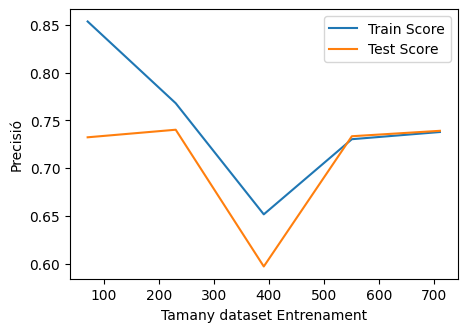

In [33]:
# Inicialitzam el nostre model sense paràmetres
percep=linear_model.Perceptron(random_state = 42)

# Obtenim tamany de datasets, precisions d'entrenament i test per a visualitzar
train_size_abs, train_scores, test_scores= learning_curve(
     percep, x, y)

# Gràfic per a veure com evoluciona la precisió segons el tamany del dataset
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3.5)
plt.plot(train_size_abs,np.mean(train_scores,axis=1),label='Train Score')
plt.plot(train_size_abs,np.mean(test_scores,axis=1),label='Test Score')
plt.xlabel('Tamany dataset Entrenament')
plt.ylabel("Precisió")
plt.legend()
plt.show()

Com es pot veure, a l'anterior gràfic mostrem la mateixa informació que per al model de regressió lineal, però en aquest cas per al perceptró. Observant el gràfic podem extreure unes conclusions paregudes a l'anterior model: el tamany optim de dades de train es troba entre 200-250, el que suposa un 30-35% aproximàdament de les dades totals. Per aquest motiu, hem decidit que per aquest model utilitzarem les dades pràviament dividides a la regressió lineal (per tant no fa falta tornar a fer la divisió de dades).

Una vegada tenim les dades amb les quals entrenar i testejar al perceptró, passem a l'entrenament d'aquest:

In [34]:
# Entrenament model amb dades de train
hist=percep.fit(X_train,y_train)

#### 3.2.2 Avaluació

Per al perceptró avaluarem el seu entrenament amb els mateixos atributs que al de regressió lineal: Precissió, Pèrdua i Puntuació F1.

In [35]:
# Fem que el model de perceptró ens doni una predicció amb les dades de test
prediccioPerc=percep.predict(X_test)
# Treim la precissió de la predicció
precisioPerc=round(accuracy_score(prediccioPerc,y_test)*100,2)
# Treim el F1 score de la predicció
f1Perc=f1_score(y_test,prediccioPerc)

# Mostram els atributs extrets
print(classification_report(y_test, prediccioPerc))
print('La precisió del nostre model és: ',precisioPerc)
print('La puntuació F1 del nostre model és: ',round(f1Perc*100,2))

              precision    recall  f1-score   support

           0       0.77      0.25      0.37       190
           1       0.43      0.89      0.58       122

    accuracy                           0.50       312
   macro avg       0.60      0.57      0.48       312
weighted avg       0.64      0.50      0.45       312

La precisió del nostre model és:  49.68
La puntuació F1 del nostre model és:  57.91


#### 3.2.3 Parameter tuning

Com en el model anterior, farem una optimització d'alguns dels paràmetres del perceptró per tal de mirar de millorar els resultats obtinguts de la predicció. Els paràmetres escollits per a la optimització del perceptró són:

1. penalty
2. fit_intercept
3. alpha
4. max_iter
5. tol
6. shuffle
7. early_stopping
8. validation_fraction

In [36]:
# Pràmetres a optimitzar del perceptró
penalty=['l1', 'l2', 'elasticnet', None]
fit_intercept = [True, False]
alpha = np.arange(1e-5,0.01,0.005)
max_iter = np.arange(900,1100,10)
tole=np.arange(1e-4,0.01,0.005)
shuffle = [True, False]
early_stopping = [True, False]
validation_fraction = np.arange(0.01,0.1,0.005)
parameters={'penalty':penalty,'fit_intercept':fit_intercept,'max_iter':max_iter,
            'shuffle':shuffle,'early_stopping':early_stopping,
            'validation_fraction':validation_fraction, 'tol':tole, 'alpha':alpha}

# Aquesta funció ens treurà la millor combinació de paràmetres
grid=GridSearchCV(estimator=percep,param_grid=parameters,cv = 2, n_jobs=-1)
# Amb GridSearch seleccionem els millors paràmetre i els mostrem
grid.fit(X_train, y_train);
print('Els millors paràmetres que podem seleccionar són:', grid.best_params_)

Els millors paràmetres que podem seleccionar són: {'alpha': 0.00501, 'early_stopping': True, 'fit_intercept': True, 'max_iter': 900, 'penalty': 'elasticnet', 'shuffle': False, 'tol': 0.0001, 'validation_fraction': 0.024999999999999998}


#### 3.2.4 Avaluació amb paràmetres òptims

Després d'haver utilitzat la tècnica del parameter tuning i haver provat el model amb tantes combinacions diferentes com desitjat, l'avaluarem de nou i compararem la millora.

In [37]:
# Tornam a instanciar el classificador perceptró, però ara amb els paràmetres optimitzats
percepOpti=linear_model.Perceptron(early_stopping = grid.best_params_['early_stopping'],
                                   fit_intercept = grid.best_params_['fit_intercept'],
                                   penalty = grid.best_params_['penalty'],
                                   shuffle= grid.best_params_['shuffle'], 
                                   validation_fraction = grid.best_params_['validation_fraction'],
                                   max_iter = grid.best_params_['max_iter'], 
                                   tol = grid.best_params_['tol'], alpha = grid.best_params_['alpha'])
# Entrenem el classificador optimitzat amb les mateixes dades de train que el no optimitzat
hist=percepOpti.fit(X_train,y_train)

# Obtenim la precissió, la pèrdua i la puntuació F1
prediccioPercOpt=percepOpti.predict(X_test)
precisioPerc2=round(accuracy_score(prediccioPercOpt,y_test)*100,2)
f1Perc2=f1_score(y_test,prediccioPercOpt)

# Mostrem per pantalla els resultats obtinguts
print(classification_report(y_test, prediccioPercOpt))
print('La precisió del nostre model és: ',precisioPerc2)
print('La puntuació F1 del nostre model és: ',round(f1Perc2*100,2))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83       190
           1       0.80      0.56      0.66       122

    accuracy                           0.77       312
   macro avg       0.78      0.73      0.74       312
weighted avg       0.78      0.77      0.76       312

La precisió del nostre model és:  77.24
La puntuació F1 del nostre model és:  65.7


#### 3.2.4 Comparació inicial vs optimitzat

In [38]:
precisionsPerc=[precisioPerc,precisioPerc2]
precisionsF1Perc=[f1Perc,f1Perc2]
matriu=zip(precisionsPerc,precisionsF1Perc)
taula_ComparacioPerc=pd.DataFrame(matriu,columns=['Precisió','F1 Score'], 
                              index = ["Sense Optimitzar", "Optimitzat"])
# Mostrem la taula comparativa entre el model optimitzat i sense optimitzar
taula_ComparacioPerc

Precisió  F1 Score
Sense Optimitzar     49.68  0.579088
Optimitzat           77.24  0.657005

### 3.3 Random Forest

#### 3.3.1 Entrenament

Tal i com hem fet en els altres dos models, mostrarem la gràfica que ens indica el tamany que hauria de tenir el data set de train per tal de maximitzar la precissió del model quan fagi la predicció amb les dades de test.

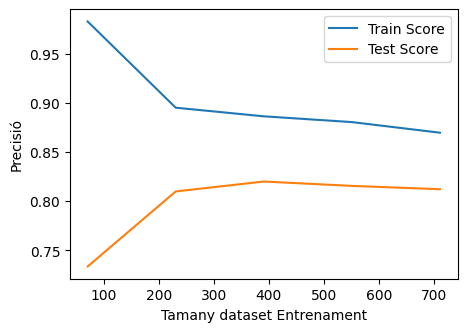

In [39]:
# Inicialitzam el nostre model sense paràmetres
random_forest=RandomForestClassifier(max_depth=6, random_state = 42)

# Obtenim tamany de datasets, precisions d'entrenament i test per a visualitzar
train_size_abs, train_scores, test_scores= learning_curve(random_forest, x, y)

# Gràfic per a veure com evoluciona la precisió segons el tamany del dataset
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3.5)
plt.plot(train_size_abs,np.mean(train_scores,axis=1),label='Train Score')
plt.plot(train_size_abs,np.mean(test_scores,axis=1),label='Test Score')
plt.xlabel('Tamany dataset Entrenament')
plt.ylabel("Precisió")
plt.legend()
plt.show()

Finalment, entrenem al classificador amb la divisió de dades de train test fet anteriorment

In [40]:
# Entrenament model amb dades de train
hist=random_forest.fit(X_train,y_train)

#### 3.3.2 Avaluació

Per a l'abre de decisió avaluarem el seu entrenament amb els mateixos atributs que a la regressió lineal i el perceptró: Precissió i Puntuació F1.

In [41]:
# Extreim una predicció amb les dades de test
prediccioRandFor=random_forest.predict(X_test)

# Treim la precissió de la predicció
precisioRandFor=round(accuracy_score(prediccioRandFor,y_test)*100,2)
# Treim el F1 score de la predicció
f1RandFor=f1_score(y_test,prediccioRandFor)

# Mostram els atributs extrets
print(classification_report(y_test, prediccioRandFor))
print('La precisió del nostre model és: ',precisioRandFor)
print('La puntuació F1 del nostre model és: ',round(f1RandFor*100,2))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       190
           1       0.83      0.67      0.74       122

    accuracy                           0.82       312
   macro avg       0.82      0.79      0.80       312
weighted avg       0.82      0.82      0.81       312

La precisió del nostre model és:  81.73
La puntuació F1 del nostre model és:  74.21


#### 3.3.3 Parameter tuning

Després d'haver entrenat el nostre model, intentarem trobar la millor combinació possible de paràmetres, amb l'objectiu de millorar-lo i que sigui més precís. Optimitzarem aquests paràmetres:

1. n_estimators: per defecte és 100, provarem un interval [10,150]
2. criterion: per defecte gini, utilitzarem {“gini”, “entropy”, “log_loss”}
3. max_depth: per defecte no hi ha limitació de profunditat provarem [1,10]
4. max_features: per defecte és sqrt, utilitzarem {“sqrt”, “log2”, None}.És la manera en que es descomposen les característiques. Per exemple: si és sqrt -> max_Features=sqrtn(n_features).

In [42]:
n_estimadors=np.arange(10,150,10)
criterion=['gini','entropy','log_loss']
max_profunditat=np.arange(1,10,1)
max_caract=['sqrt','log2',None]

parameters={'n_estimators':n_estimadors,'criterion':criterion,'max_depth':max_profunditat,
            'max_features':max_caract}

grid=GridSearchCV(estimator=random_forest,param_grid=parameters,cv = 2, n_jobs=-1)

# Amb GridSearch seleccionem els millors paràmetre i els mostrem
grid.fit(X_train, y_train);
print('Els millors paràmetres que podem seleccionar són:\n\n', grid.best_params_)

Els millors paràmetres que podem seleccionar són:

 {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'n_estimators': 70}


#### 3.3.4 Avaluació amb paràmetres òptims

Ara, avaluarem la precissió del model després d'haver optimitzat els seus paràmetres

In [43]:
# Tornam a instanciar l'abre de decissió, però ara amb els paràmetres optimitzats
random_forestOpti=RandomForestClassifier(criterion = grid.best_params_['criterion'], 
                                         max_depth = grid.best_params_['max_depth'], 
                                         max_features = grid.best_params_['max_features'],
                                         n_estimators= grid.best_params_['n_estimators'])
# Entrenem el classificador optimitzat amb les mateixes dades de train que el no optimitzat
hist=random_forestOpti.fit(X_train,y_train)

# Obtenim la precissió, la pèrdua i la puntuació F1
prediccioRandForOpti=random_forestOpti.predict(X_test)
precisioRandFor2=round(accuracy_score(prediccioRandForOpti,y_test)*100,2)
f1RandFor2=f1_score(y_test,prediccioRandForOpti)

# Mostrem per pantalla els resultats obtinguts
print(classification_report(y_test, prediccioRandForOpti))
print('La precisió del nostre model és: ',precisioRandFor2)
print('La puntuació F1 del nostre model és: ',round(f1RandFor2*100,2))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       190
           1       0.84      0.67      0.75       122

    accuracy                           0.82       312
   macro avg       0.82      0.79      0.80       312
weighted avg       0.82      0.82      0.82       312

La precisió del nostre model és:  82.05
La puntuació F1 del nostre model és:  74.55


#### 3.3.5 Comparació inicial vs optimitzat

In [44]:
precisionsRandFor=[precisioRandFor,precisioRandFor2]
precisionsF1RandFor=[f1RandFor,f1RandFor2]
matriu=zip(precisionsRandFor,precisionsF1RandFor)
taula_ComparacioRandFor=pd.DataFrame(matriu,columns=['Precisió','F1 Score'], 
                              index = ["Sense Optimitzar", "Optimitzat"])
# Mostrem la taula comparativa entre el model optimitzat i sense optimitzar
taula_ComparacioRandFor

Precisió  F1 Score
Sense Optimitzar     81.73  0.742081
Optimitzat           82.05  0.745455

### 3.4 Decision Tree Classifier

#### 3.4.1 Entrenament

Tal i com hem fet amb els altres models, mostrarem el percentatge de dades òptim per obtenir el màxim score dels resultats de test.

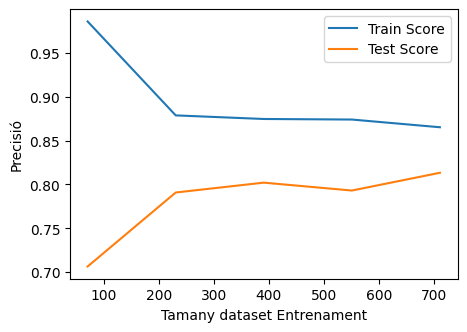

In [45]:
# Inicialitzam el nostre model sense paràmetres
decision_tree=DecisionTreeClassifier(max_depth=6, random_state = 42)

# Obtenim tamany de datasets, precisions d'entrenament i test per a visualitzar
train_size_abs, train_scores, test_scores= learning_curve(decision_tree, x, y)

# Gràfic per a veure com evoluciona la precisió segons el tamany del dataset
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(3.5)
plt.plot(train_size_abs,np.mean(train_scores,axis=1),label='Train Score')
plt.plot(train_size_abs,np.mean(test_scores,axis=1),label='Test Score')
plt.xlabel('Tamany dataset Entrenament')
plt.ylabel("Precisió")
plt.legend()
plt.show()

Finalment, entrenem al classificador amb la divisió de dades de train test fet anteriorment

In [46]:
# Entrenament model amb dades de train
hist=decision_tree.fit(X_train,y_train)

#### 3.4.2 Avaluació

Per a l'arbre de decisió avaluarem el seu entrenament amb els mateixos atributs que a la regressió logística i el perceptró: Precissió i Puntuació F1.

In [47]:
# Extreim una predicció amb les dades de test
prediccioDecTree=decision_tree.predict(X_test)

# Treim la precissió de la predicció
precisioDecTree=round(accuracy_score(prediccioDecTree,y_test)*100,2)
# Treim el F1 score de la predicció
f1DecTree=f1_score(y_test,prediccioDecTree)

# Mostram els atributs extrets
print(classification_report(y_test, prediccioDecTree))
print('La precisió del nostre model és: ',precisioDecTree)
print('La puntuació F1 del nostre model és: ',round(f1DecTree*100,2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       190
           1       0.80      0.68      0.73       122

    accuracy                           0.81       312
   macro avg       0.81      0.78      0.79       312
weighted avg       0.81      0.81      0.80       312

La precisió del nostre model és:  80.77
La puntuació F1 del nostre model és:  73.45


#### 3.4.3 Parameter Tunning

Després d'haver entrenat el nostre model, intentarem trobar la millor combinació possible de paràmetres, amb l'objectiu de millorar-lo i que sigui més precís. Emplearem els mateixos paràmetre per optimitzar-lo que en el random forest exepte el paràmetre n_estimators que l'hem substituit per splitter, el qual descrivim a continuació:

1. splitter: per defecte és "best" i pot prendre els següents valors ['best', 'random'].

In [48]:
criterion=['gini','entropy','log_loss']
max_profunditat=np.arange(1,10,1)
max_caract=['sqrt','log2',None]
splitter = ['best', 'random']

parameters={'splitter':splitter,'criterion':criterion,'max_depth':max_profunditat,
            'max_features':max_caract}

grid=GridSearchCV(estimator=decision_tree,param_grid=parameters,cv = 2, n_jobs=-1)

# Amb GridSearch seleccionem els millors paràmetre i els mostrem
grid.fit(X_train, y_train);
print('Els millors paràmetres que podem seleccionar són:\n\n', grid.best_params_)

Els millors paràmetres que podem seleccionar són:

 {'criterion': 'entropy', 'max_depth': 6, 'max_features': None, 'splitter': 'random'}


#### 3.4.4 Avaluació amb els paràmetres optimitzats

Ara, avaluarem la precissió del model després d'haver optimitzat els seus paràmetres

In [49]:
# Tornam a instanciar l'abre de decissió, però ara amb els paràmetres optimitzats
random_treeOpti=RandomForestClassifier(criterion = 'gini', max_depth = 9, max_features = None,
                                     n_estimators= 80)
# Entrenem el classificador optimitzat amb les mateixes dades de train que el no optimitzat
hist=random_treeOpti.fit(X_train,y_train)

# Obtenim la precissió, la pèrdua i la puntuació F1
prediccioDecTreeOpt=random_treeOpti.predict(X_test)
precisioDecTree2=round(accuracy_score(prediccioDecTreeOpt,y_test)*100,2)
f1DecTree2=f1_score(y_test,prediccioDecTreeOpt)

# Mostrem per pantalla els resultats obtinguts
print(classification_report(y_test, prediccioDecTreeOpt))
print('La precisió del nostre model és: ',precisioDecTree2)
print('La puntuació F1 del nostre model és: ',round(f1DecTree2*100,2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       190
           1       0.80      0.70      0.75       122

    accuracy                           0.81       312
   macro avg       0.81      0.79      0.80       312
weighted avg       0.81      0.81      0.81       312

La precisió del nostre model és:  81.41
La puntuació F1 del nostre model és:  74.78


#### 3.4.5 Comparació inicial vs optimitzat

In [50]:
precisionsDecTree=[precisioDecTree,precisioDecTree2]
precisionsF1DecTree=[f1DecTree,f1DecTree2]
matriu=zip(precisionsDecTree,precisionsF1DecTree)
taula_ComparacioDecTree=pd.DataFrame(matriu,columns=['Precisió','F1 Score'], 
                              index = ["Sense Optimitzar", "Optimitzat"])
# Mostrem la taula comparativa entre el model optimitzat i sense optimitzar
taula_ComparacioDecTree

Precisió  F1 Score
Sense Optimitzar     80.77  0.734513
Optimitzat           81.41  0.747826

## 4 Feature Importance

En aquesta darrera etapa, obtindrem la importància de cada característica que assigna el model, mitjançant pesos per característica. La nostra principal metodologia sirà obtenir els pesos i després normalitzar-los en % de valor absolut, que representaran la importància en la decisió.

### 4.1 Regressió logística

#### 4.1.1 Extracció de coeficients d'importancia

El primer que farem serà extreure els coeficients d'importancia de cada una de les característiques que tenim dintre del data set. Les extreim de la següent forma:

In [51]:
# Obtenim els coeficients de cada cararacterística
pesos_reg = logistic_reg.coef_
# Mostram els pesos de cada característica
pesos_reg

array([[-2.53840712, -0.50109607, -0.39723718, -0.06317559,  0.14160783,
         0.34985642, -0.06638265, -0.28356108,  0.84895738,  0.21494643,
        -1.06399112]])

Com podem observar, els coeficients mostrats representen tant valors positius com negatius. Això es deu a que indiquen la importancia de la caractarística en funció de si augmenten o disminueixen la probabilitat del passatger de sobreviure. Per tant, si un coeficient indica un valor negatiu, vol dir que tindrà més probabilitats de morir mentre que els positius indiquen que en tindrà més probabillitat de sobreviure. Una vegada tenim els coeficients de cada característica, els mostrarem amb un histograma amb el següent codi per poder veure la diferencia entre cada característica:

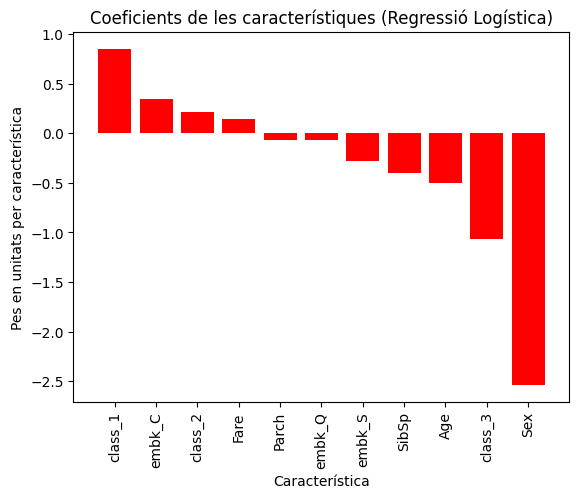

In [52]:
# Ordena las características de mayor a menor importancia
indices = np.argsort(pesos_reg[0])[::-1]
X=data.drop('Survived',axis=1)
# Crea una lista con los nombres de las características
feature_names = X.columns
pesos_reg=pesos_reg[0]
# Crea el gráfico
plt.figure()
plt.title("Coeficients de les característiques (Regressió Logística)")
plt.bar(range(X.shape[1]), pesos_reg[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Característica")
plt.ylabel('Pes en unitats per característica')
plt.show()

#### 4.1.2 Percentange d'importancia de cada característica

Després d'haver obtingut els pesos de cada característica i haver explicat la seva importància/direcció, treurem els seus percentatges en valor absolut per tal de poder comparar-les entre elles.

Array de tans per 1 de cada característica:

 [0.39238232 0.07745851 0.0614042  0.00976557 0.02188948 0.05408016
 0.01026131 0.04383235 0.13123028 0.03322603 0.1644698 ]


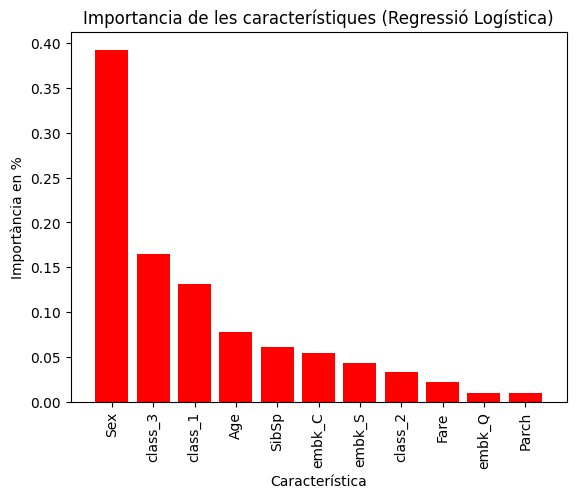

In [53]:
percentatge_regr = []
suma=sum([abs(ele) for ele in logistic_reg.coef_[0]])
for x in logistic_reg.coef_[0]:
    percentatge_regr.append(abs(x)/suma)
#Convertim array en numpy array per a poder utilitzar-lo posteriorment
percentatge_regr=np.array(percentatge_regr)
print("Array de tans per 1 de cada característica:\n\n "+str(percentatge_regr))

# Ordenam les característiques de major a menor importancia
indices = np.argsort(percentatge_regr)[::-1]
X=data.drop('Survived',axis=1)
# Llista amb els noms de les característiques
feature_names = X.columns

# Cream el gràfic
plt.figure()
plt.title("Importancia de les característiques (Regressió Logística)")
plt.bar(range(X.shape[1]), percentatge_regr[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Característica")
plt.ylabel('Importància en %')
plt.show()

Per tant, podem veure que la carcaterística més determinant és la del sexe (com ja preveiem al principi de la pràctica). La segueixen amb una importancia bastant menor les característiques de si el passatger és de primera classe (class_1) i si el passatger es de tercera classe (class_3).

### 4.2 Perceptró

#### 4.2.1 Extracció de coeficients d'importancia

Com hem fet en l'anterior model, el primer que farem és extreure els coeficients d'importancia de cada característica.

In [54]:
# Obtenim els coeficients de cada cararacterística
pesos_percep = percep.coef_
# Mostram els pesos de cada característica
pesos_percep

array([[-5.        , -3.54346437, -5.09564337, -1.13140666,  2.80219993,
         4.        ,  1.        ,  0.        ,  4.        ,  0.        ,
         1.        ]])

D'aquests coeficients podem dir el mateix que hem dit per als obtinguts en el model de la regressió lineal. Una vegada comentats, mostrarem aquests coeficients assignats a cada una de les columnes per a una major claritat:

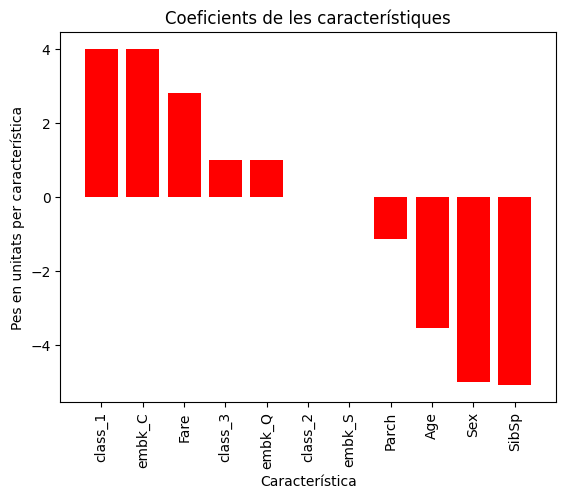

In [55]:
# Ordena las características de mayor a menor importancia
indices = np.argsort(pesos_percep[0])[::-1]
X=data.drop('Survived',axis=1)
# Crea una lista con los nombres de las características
feature_names = X.columns
pesos_percep=pesos_percep[0]
# Crea el gráfico
plt.figure()
plt.title("Coeficients de les característiques")
plt.bar(range(X.shape[1]), pesos_percep[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Característica")
plt.ylabel('Pes en unitats per característica')
plt.show()

#### 4.2.2 Percentange d'importancia de cada característica

Després d'haver obtingut els pesos de cada característica treurem els seus percentatges en valor absolut per tal de poder comparar-les entre elles.

Array de tans per 1 de cada característica:

 [0.18133869 0.12851344 0.18480746 0.04103356 0.10162945 0.14507096
 0.03626774 0.         0.14507096 0.         0.03626774]


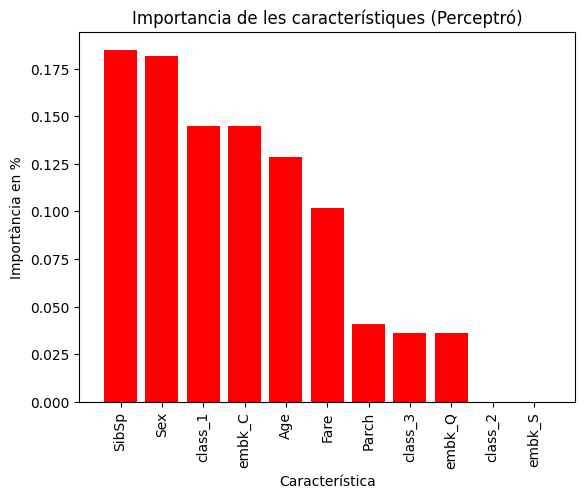

In [56]:
percentatge_percep = []
suma=sum([abs(ele) for ele in percep.coef_[0]])
for x in percep.coef_[0]:
    percentatge_percep.append(abs(x)/suma)
#Convertim array en numpy array per a poder utilitzar-lo posteriorment
percentatge_percep=np.array(percentatge_percep)
print("Array de tans per 1 de cada característica:\n\n "+str(percentatge_percep))

# Ordenam les característiques de major a menor importancia
indices = np.argsort(percentatge_percep)[::-1]
X=data.drop('Survived',axis=1)
# Llista amb els noms de les característiques
feature_names = X.columns

# Cream el gràfic
plt.figure()
plt.title("Importancia de les característiques (Perceptró)")
plt.bar(range(X.shape[1]), percentatge_percep[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Característica")
plt.ylabel('Importància en %')
plt.show()

Per tant, podem veure que la carcaterística més determinant és la del sexe (com ja preveiem al principi de la pràctica i com ja passava amb el model de la regressió lineal). La segueixen amb una importancia una mica menor les característiques de si el passatger és de primera classe (class_1) i la quantitat de doblers que varen pagar el passatger per aconsseguir el billet per al vaixell (Fare).

### 4.3 Random Forest

#### 4.3.1 Percentange d'importancia de cada característica

Array de tans per 1 d'importancia de cada atribut: 

[0.37168535 0.13434699 0.0504884  0.04847977 0.17411641 0.02088795
 0.01160316 0.01996781 0.04360276 0.02188825 0.10293315]


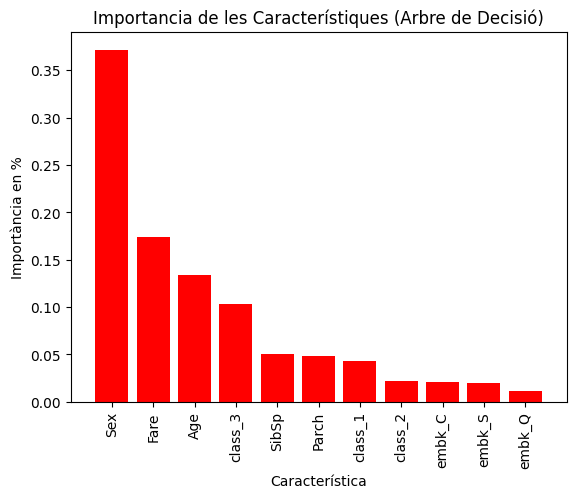

In [57]:
# Obtenim els coeficients de cada cararacterística
pesos_random_fores = random_forest.feature_importances_
# Mostram els pesos de cada característica
print("Array de tans per 1 d'importancia de cada atribut: \n\n" + str(pesos_random_fores))

# Ordena las características de mayor a menor importancia
indices = np.argsort(pesos_random_fores)[::-1]
X=data.drop('Survived',axis=1)
# Crea una lista con los nombres de las características
feature_names = X.columns

# Cream el grafic
plt.figure()
plt.title("Importancia de les Característiques (Arbre de Decisió)")
plt.bar(range(X.shape[1]), pesos_random_fores[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Característica")
plt.ylabel('Importància en %')
plt.show()

### 4.4 Decision Tree Classifier

#### 4.4.1 Percentange d'importancia de cada característica

En el cas del model de l'arbre de decissió, seguirem un platejament lleugerament diferent respecte dels dos models anterior. Això, es deu a que el model de l'arbre de decissió ja té un mètode que directament extreu la importancia de cada una de les característiques de les dades. Això ho fem amb l'atribut "feature_importances_".

Array de tans per 1 d'importancia de cada atribut: 

[0.48241404 0.11146215 0.0637048  0.         0.17233195 0.00819291
 0.         0.01689252 0.         0.01108471 0.13391691]


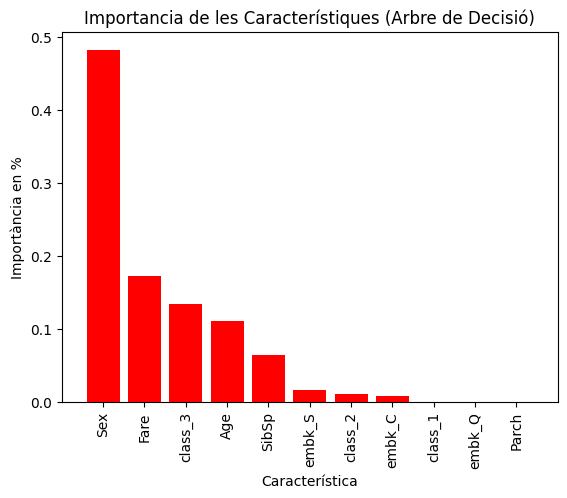

In [58]:
# Obtenim els coeficients de cada cararacterística
pesos_decision_tree = decision_tree.feature_importances_
# Mostram els pesos de cada característica
print("Array de tans per 1 d'importancia de cada atribut: \n\n" + str(pesos_decision_tree))

# Ordena las características de mayor a menor importancia
indices = np.argsort(pesos_decision_tree)[::-1]
X=data.drop('Survived',axis=1)
# Crea una lista con los nombres de las características
feature_names = X.columns

# Cream el grafic
plt.figure()
plt.title("Importancia de les Característiques (Arbre de Decisió)")
plt.bar(range(X.shape[1]), pesos_decision_tree[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Característica")
plt.ylabel('Importància en %')
plt.show()

Com es pot observar, com en els altres dos models, l'atribut més determinant és el sexe seguit de la quantitat de doblers que va pagar el passatger per el billet (Fare) i l'edat del passatger.

## 5 Conclusions

Les conclusions que en podem extreure d'aquesta pràctica després de tota la feina realitzada són:

1. Dels 4 models que hem entrenat, sense optimitzacions, els millors han estat la regressió logística i el random forest, amb un 81.73% de precissió de classificador.

2. Si mirem els 4 models optimitzats, la millora més gran en la optimització del models amb els paràmetre que hem seleccionat és el perceptró, que ha passat de un 49.68% a un 77.24% de precissió.

3. Si comparem els 4 models optimitzats, el millor ha estat el de la regressió logística amb un 81.73% de precissió.

4. Pel que fa als atributs, el més destacat per importancia en tots els models ha estat el sexe. Seguit de Fare, class_3 i class_1 (en general són els que es mantenen amb una certa importancia en tots els models).